In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [4]:
data=pd.read_csv("Props_price.csv",index_col='Date')
data

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2020-07-20,0.04470,0.05712,0.04227,0.04825,0.0,0.0
2020-07-21,0.04821,0.05189,0.04634,0.04644,0.0,0.0
2020-07-22,0.04645,0.05624,0.04023,0.04462,0.0,0.0
2020-07-23,0.04462,0.05016,0.04119,0.04572,0.0,0.0
2020-07-24,0.04572,0.05006,0.04321,0.04758,0.0,0.0
...,...,...,...,...,...,...
2021-07-20,0.03689,0.03723,0.03389,0.03449,154791.0,12372276.0
2021-07-21,0.03450,0.03746,0.03370,0.03710,241002.0,13312212.0
2021-07-22,0.03711,0.04405,0.03461,0.04255,677304.0,15333875.0


<AxesSubplot:xlabel='Date'>

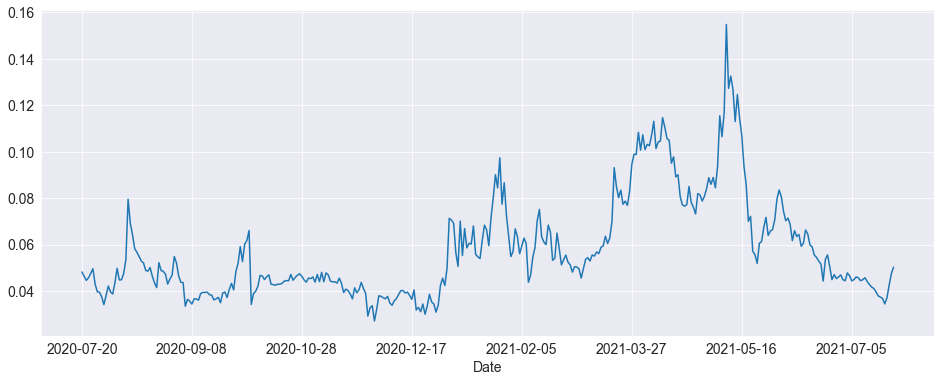

In [5]:
data["Close**"].plot()

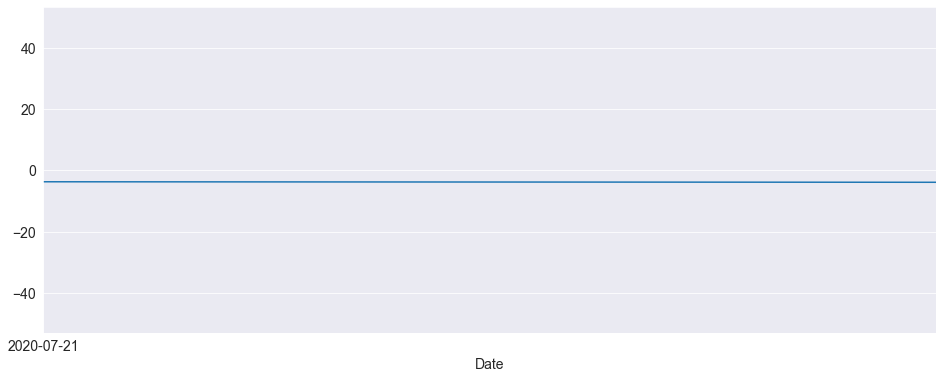

In [6]:
import datetime as dt
st = dt.datetime(2020, 7, 24)
en = dt.datetime(2021, 7, 20)
market = data["Close**"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# GARCH with constant mean

In [7]:
from arch import arch_model

am = arch_model(returns)
res = am.fit()
# res = am.fit(update_freq=5)
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1531.081155147978
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1739.5156880451316
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1352.1708016878756
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1411.6617222838372
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1351.6111750750872
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1351.3249810612651
Iteration:      7,   Func. Count:     40,   Neg. LLF: 1351.2940041036845
Iteration:      8,   Func. Count:     45,   Neg. LLF: 1351.2165770729453
Iteration:      9,   Func. Count:     50,   Neg. LLF: 1351.215852267624
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1351.215829985115
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1351.2158297712267
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1351.215829985115
            Iterations: 11
            Function evaluations: 59
            Gradient evaluat

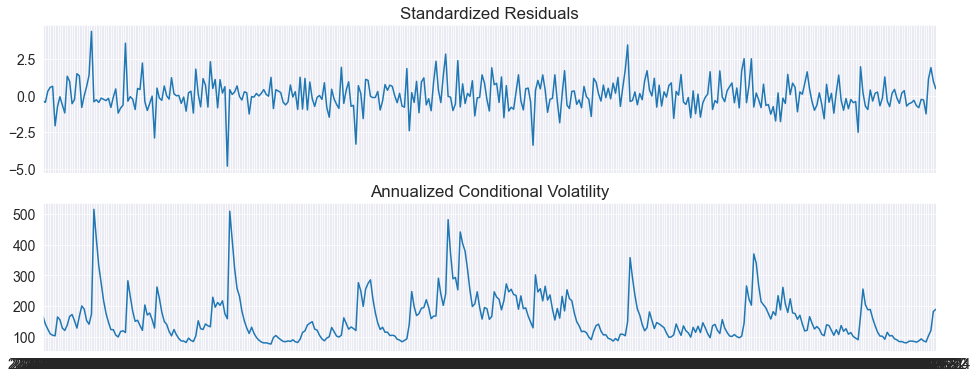

In [8]:
fig = res.plot(annualize='D')

## GJR-GARCH includes one lag of an asymmetric shock which transforms a GARCH model into a GJR-GARCH model with variance dynamics given by

𝜎2𝑡=𝜔+𝛼𝜖2𝑡−1+𝛾𝜖2𝑡−1𝐼[𝜖𝑡−1<0]+𝛽𝜎2𝑡−1
where 𝐼 is an indicator function that takes the value 1 when its argument is true.

In [9]:
am = arch_model(returns, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Close**   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1349.92
Distribution:                  Normal   AIC:                           2709.84
Method:            Maximum Likelihood   BIC:                           2729.39
                                        No. Observations:                  369
Date:                Mon, Jul 26 2021   Df Residuals:                      368
Time:                        08:08:08   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2748      0.383      0.718      0.473 [ -0.476,  1.02

# TARCH

In [10]:
am = arch_model(returns, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1340.3589987664973
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1339.926291287551
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1339.9260392731305
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:                Close**   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1339.93
Distribution:                  Normal   AIC:                           2689.85
Method:            Maximum Likelihood   BIC:                           2709.41
                                        No. Observations:                  369
Date:                Mon, Jul 26 2021   Df Residuals:                      368
Time:        

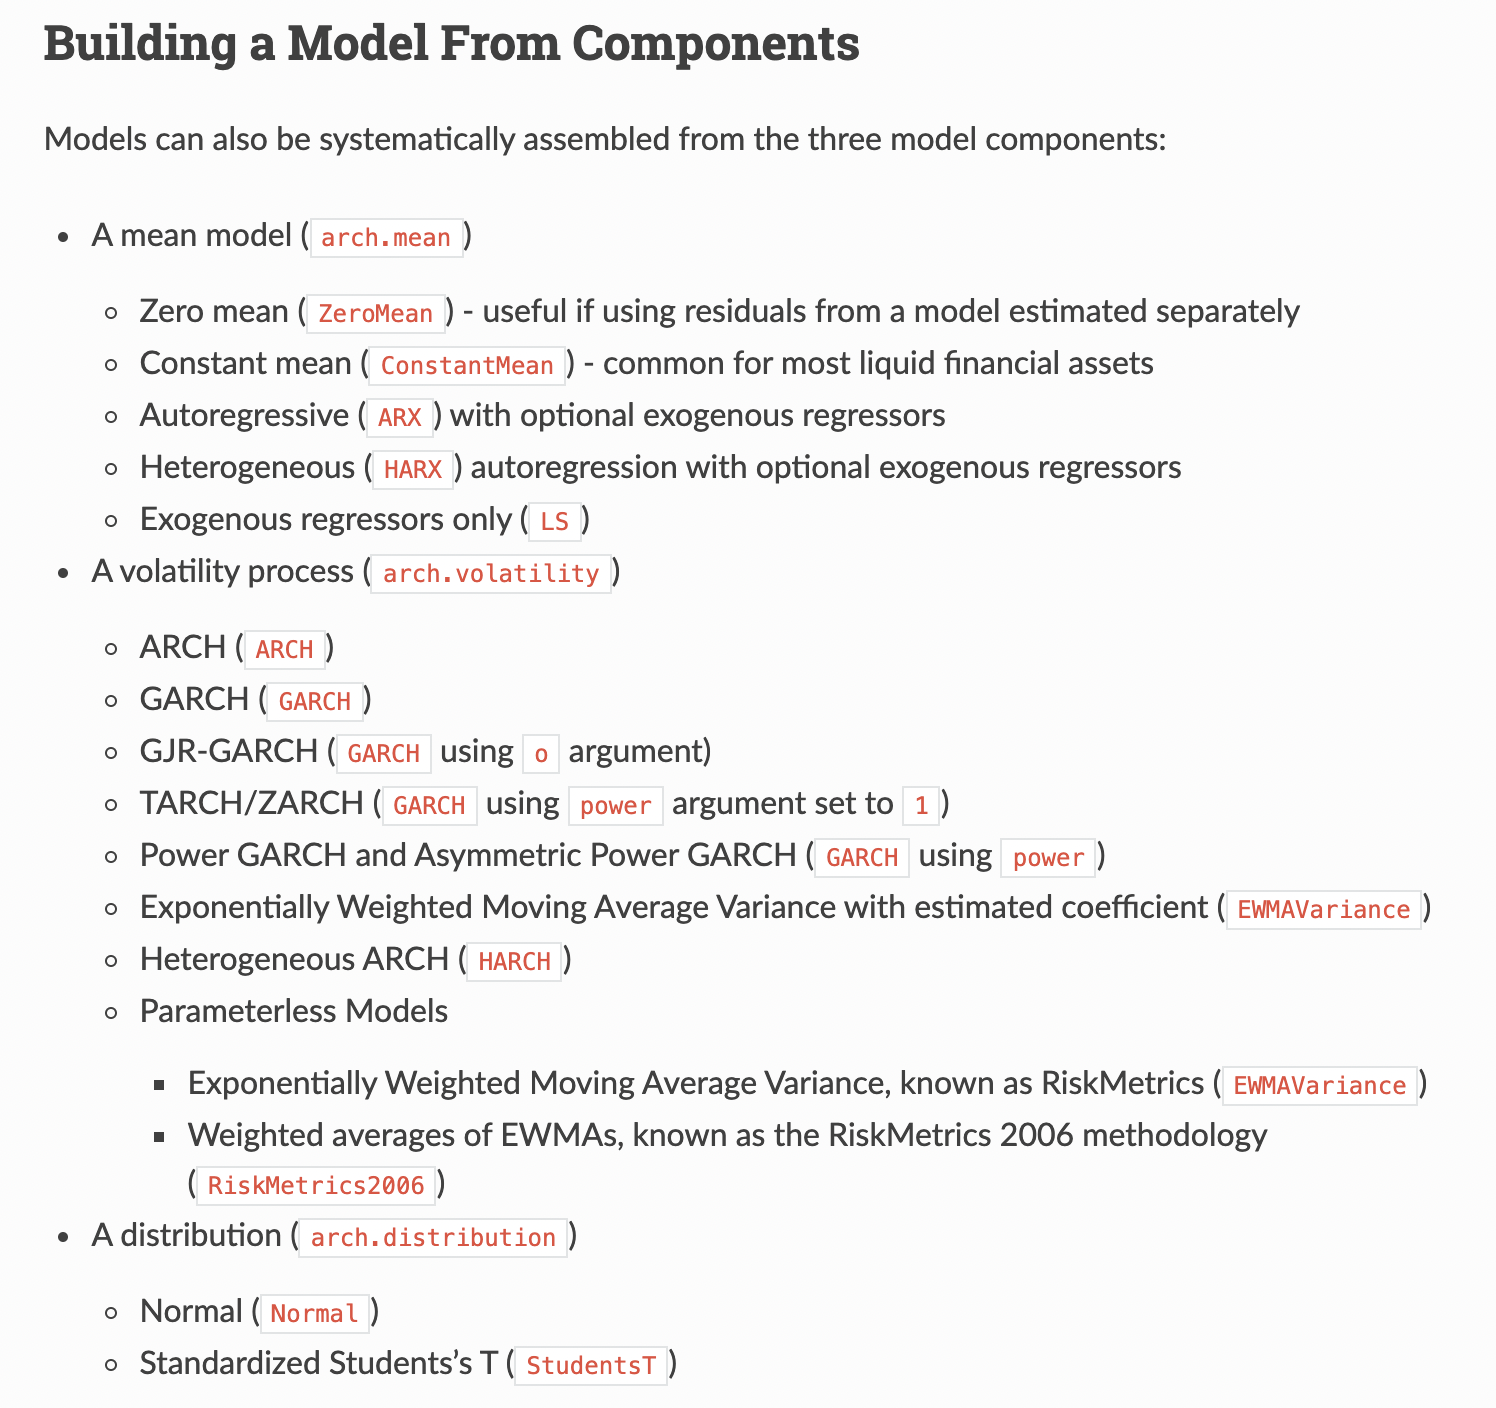

# simulation (to be added soon)

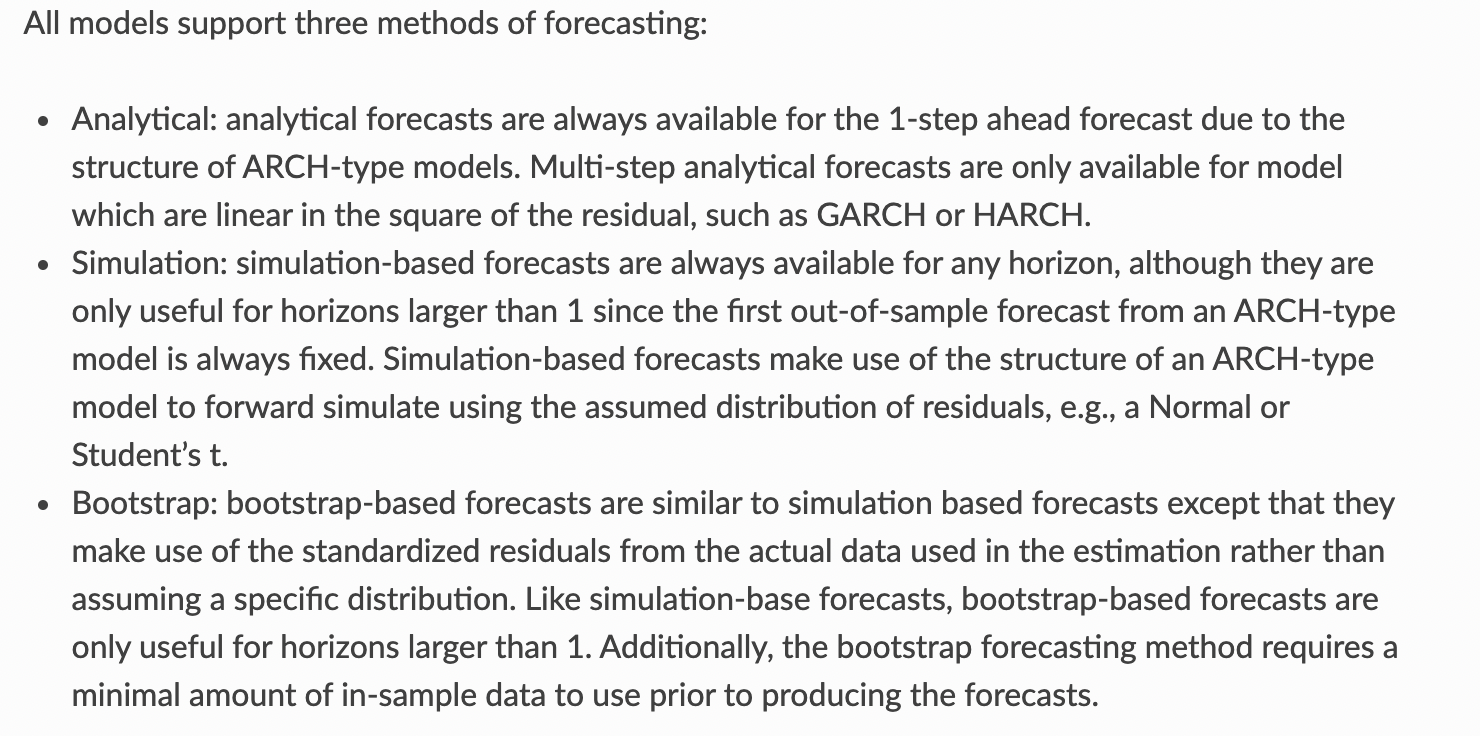

# Forecasting

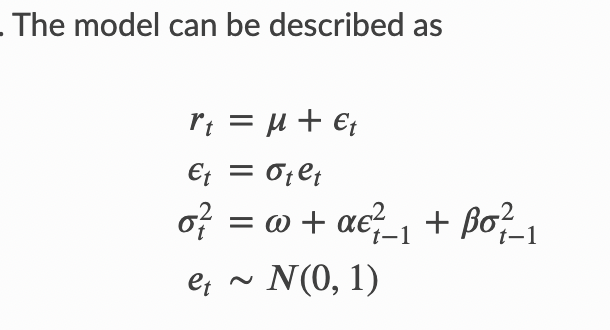

In [11]:
from arch import arch_model
import datetime as dt
import pandas_datareader.data as web
start = dt.datetime(2020, 7, 24)
end = dt.datetime(2021, 7, 20)
market02 = data["Close**"]
returns02 = 100 * market02.pct_change().dropna()
am02 = arch_model(returns02, vol='Garch', p=1, o=0, q=1, dist='Normal')

In [13]:
split_date = np.array(['2020-06-01'], dtype='datetime64')

In [20]:
print(data.index)

Index(['7/20/20', '7/21/20', '7/22/20', '7/23/20', '7/24/20', '7/25/20',
       '7/26/20', '7/27/20', '7/28/20', '7/29/20',
       ...
       '7/15/21', '7/16/21', '7/17/21', '7/18/21', '7/19/21', '7/20/21',
       '7/21/21', '7/22/21', '7/23/21', '7/24/21'],
      dtype='object', name='Date', length=370)


In [14]:
# split_date = dt.datetime(2021,6,1)
resp = am02.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1531.081155147978
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1739.5156880451316
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1352.1708016878756
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1411.6617222838372
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1351.6111750750872
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1351.3249810612651
Iteration:      7,   Func. Count:     40,   Neg. LLF: 1351.2940041036845
Iteration:      8,   Func. Count:     45,   Neg. LLF: 1351.2165770729453
Iteration:      9,   Func. Count:     50,   Neg. LLF: 1351.215852267624
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1351.215829985115
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1351.2158297712267
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1351.215829985115
            Iterations: 11
            Function evaluations: 59
            Gradient evaluat

<AxesSubplot:xlabel='Date'>

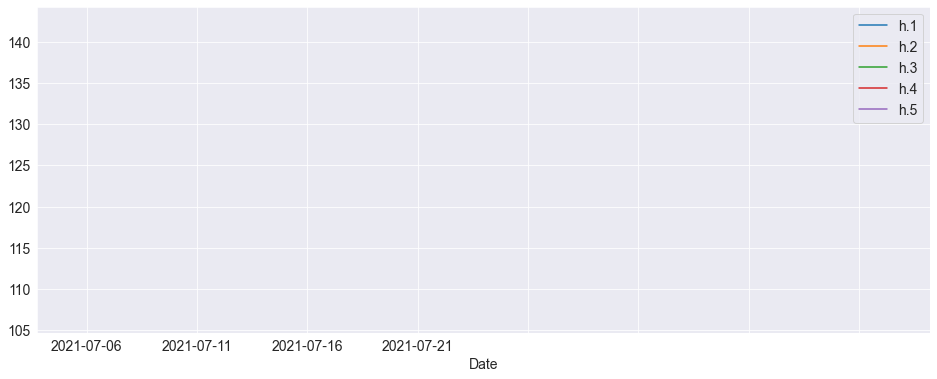

In [18]:

forecasts = resp.forecast(horizon=5, start=split_date)
forecasts.variance[str(split_date[0]):].plot()

/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

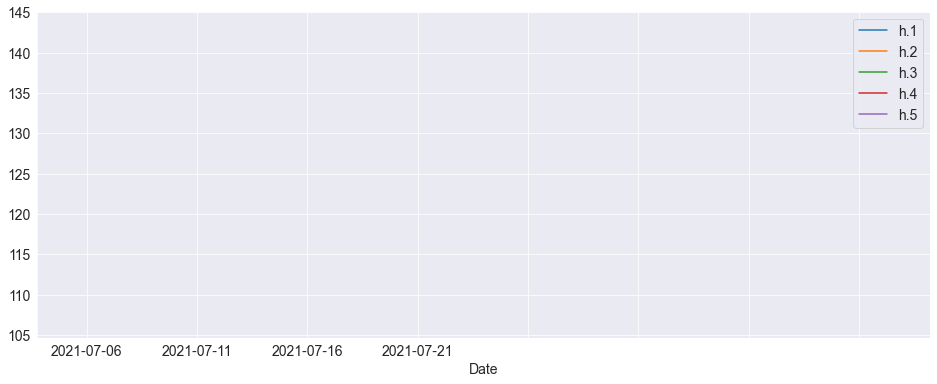

In [19]:
forecasts = resp.forecast(horizon=5, start=split_date, method='simulation')
forecasts.variance[str(split_date[0]):].plot()